# IEDA3302 Project - Group 15

### Conjecture:  A country's employment rate is mainly dependent on the prevalence and affluence of their education system.

In this project, our group aims to verify whether receiving education, and to what extent, is the main factor to being employed.

For this project, we will make a few assumptions:
- the prevalence and affluence of a country's education system is directly linked to the overall literacy rate, as well as mean years of school for both men and women
- when we make comparisons, that a country's economy is represented by their GDP

Our hypothesis for this conjecture is that the greater prevalence and affluence of a country's education system, the higher their employment rate will be.

-

### Collecting and Concatenating Data

Firstly, our group will mainly take 5 different tables from GapMinder:

- the employment rate of those aged 15+
- the unemployment rate of those ages 15+
- the literacy rate of those aged 15+
- the mean years of school for men aged 25+
- the mean years of school for women aged 25+

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib as mpl
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

E:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
employment = pd.read_csv(r"./aged_15plus_employment_rate_percent.csv", sep=',', index_col = 'country')
unemployment = pd.read_csv(r"./aged_15plus_unemployment_rate_percent.csv", sep=',', index_col = 'country')
literacy = pd.read_csv(r"./literacy_rate_adult_total_percent_of_people_ages_15_and_above.csv", sep=',', index_col = 'country')
yrsinschoolM = pd.read_csv(r"./mean_years_in_school_men_25_years_and_older.csv", sep=',', index_col = 'country')
yrsinschoolW = pd.read_csv(r"./mean_years_in_school_women_25_years_and_older.csv", sep=',', index_col = 'country')

In [3]:
yrsinschool = pd.concat([yrsinschoolM, yrsinschoolW])

In [32]:
employment2 = employment.T.describe().T
unemployment2 = unemployment.T.describe().T
literacy2 = literacy.T.describe().T
yrsinschoolM2 = yrsinschoolM.T.describe().T
yrsinschoolW2 = yrsinschoolW.T.describe().T

yrsinschool2 = yrsinschool.T.describe().T
employment2

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Afghanistan,32.0,0.476594,0.014420,0.453,0.46000,0.4780,0.48800,0.496
Albania,32.0,0.479406,0.012021,0.449,0.47275,0.4800,0.48400,0.508
Algeria,32.0,0.352406,0.026258,0.306,0.32675,0.3660,0.37200,0.394
Angola,32.0,0.649875,0.056437,0.592,0.59300,0.6370,0.70675,0.722
Argentina,32.0,0.541813,0.020809,0.491,0.53275,0.5475,0.55950,0.565
...,...,...,...,...,...,...,...,...
Venezuela,32.0,0.577094,0.020557,0.529,0.56225,0.5835,0.59425,0.606
Vietnam,32.0,0.757281,0.006878,0.746,0.75150,0.7575,0.76225,0.771
Yemen,32.0,0.361469,0.038905,0.320,0.32475,0.3490,0.40775,0.416


In [31]:
employment2["mean"]

country
Afghanistan    0.476594
Albania        0.479406
Algeria        0.352406
Angola         0.649875
Argentina      0.541813
                 ...   
Venezuela      0.577094
Vietnam        0.757281
Yemen          0.361469
Zambia         0.686250
Zimbabwe       0.756219
Name: mean, Length: 179, dtype: float64

In [33]:
data = [employment2["mean"], unemployment2["mean"], literacy2["mean"], yrsinschoolM2["mean"], yrsinschoolW2["mean"]]
headers = ["Employment Rate", "Unemployment Rate", "Literacy Rate", "Avg. Years in School (M)", "Avg. Years in School (W)"]

df = pd.concat(data, axis = 1, keys = headers, sort = True)


[country
 Afghanistan    0.476594
 Albania        0.479406
 Algeria        0.352406
 Angola         0.649875
 Argentina      0.541813
                  ...   
 Venezuela      0.577094
 Vietnam        0.757281
 Yemen          0.361469
 Zambia         0.686250
 Zimbabwe       0.756219
 Name: mean, Length: 179, dtype: float64, country
 Afghanistan            0.020900
 Albania                0.148455
 Algeria                0.178850
 Angola                 0.131150
 Antigua and Barbuda    0.060000
                          ...   
 Venezuela              0.088543
 Vietnam                0.019175
 Yemen                  0.125000
 Zambia                 0.111700
 Zimbabwe               0.065900
 Name: mean, Length: 186, dtype: float64, country
 Afghanistan            0.286000
 Albania                0.971333
 Algeria                0.640667
 Angola                 0.689000
 Antigua and Barbuda    0.990000
                          ...   
 Venezuela              0.916400
 Vietnam              

In [6]:
print(df)

                     Employment Rate  Unemployment Rate  Literacy Rate  \
Afghanistan                 0.476594           0.020900       0.286000   
Albania                     0.479406           0.148455       0.971333   
Algeria                     0.352406           0.178850       0.640667   
Angola                      0.649875           0.131150       0.689000   
Antigua and Barbuda              NaN           0.060000       0.990000   
...                              ...                ...            ...   
Venezuela                   0.577094           0.088543       0.916400   
Vietnam                     0.757281           0.019175       0.890600   
Yemen                       0.361469           0.125000       0.524000   
Zambia                      0.686250           0.111700       0.659000   
Zimbabwe                    0.756219           0.065900       0.816333   

                     Avg. Years in School (M)  Avg. Years in School (W)  
Afghanistan                          

In [7]:
df = df.dropna()

In [8]:
df.max()

Employment Rate              0.856188
Unemployment Rate            0.313250
Literacy Rate                0.997667
Avg. Years in School (M)    10.582500
Avg. Years in School (W)    10.130000
dtype: float64

Above, "df" represents our final dataframe, where we tried to compile all the data files into one frame. To do so, we took the mean of each attribute and then with the different means, we compiled them all into one dataframe.

### Visualization and Correlation

In this part of the project, our group will use visualization to identify a rough correlation, or the lack thereof.

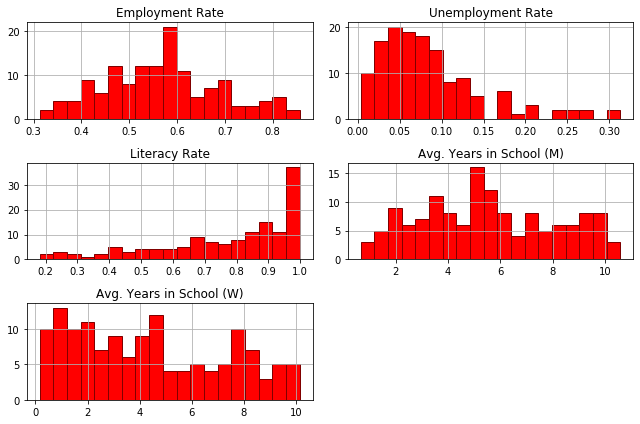

In [9]:
df.hist(bins=19, color='red', edgecolor='maroon', linewidth=1.0,
           xlabelsize=10, ylabelsize=10, grid=True)

plt.tight_layout(rect=(10, 10, 11.5, 11.5))

Above, we first tried to visualize our data in the form of histograms.
From the above data, we can see the following:
- For the average number of years men spend in school, majority of the countries last around 4-10 years. 
- For that of women, there is a decreasing trend on the average number of years spent in school.
- Most countries included in the data have an employment percentage around 60%.
- Whereas, the unemployment percentage generally ranges from 0-15% for most countries.
- The literacy rate shows an increasing trend, where most countries listed have literacy percentages above 50%.

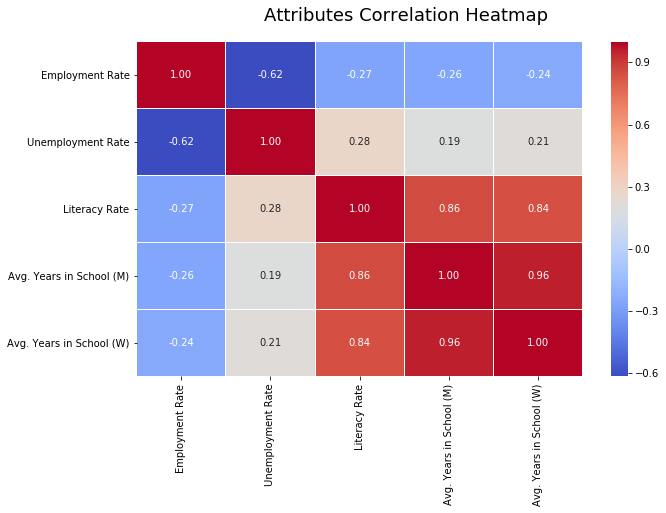

In [10]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,4), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.1)
f.subplots_adjust(top=0.9)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=18)

Our group also tried to create a heat map to try and look for any correlations among the different attributes we've selected. 

From the heat map, the correlation of employment rate with literacy rate and average number of years in school for both men and women show a negative relation. The negative correlations imply that as the employment rate increases, the literacy rate and the average number of years are lower.

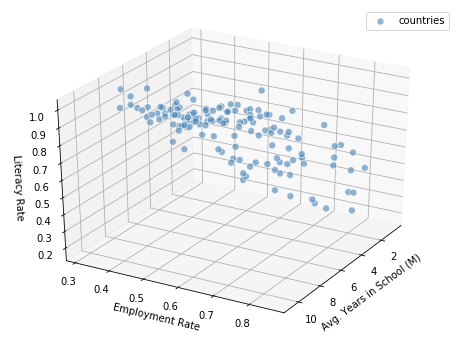

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['Avg. Years in School (M)']
ys = df['Employment Rate']
zs = df['Literacy Rate']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = 'steelblue', label = 'countries')

ax.set_xlabel('Avg. Years in School (M)')
ax.set_ylabel('Employment Rate')
ax.set_zlabel('Literacy Rate')

ax.view_init(30,30)
plt.legend()

Above, our group chose to visualize the correlation of three attributes through an 3D scatterplot. We chose three attributes among the five above, namely employment rate, literacy rate, and the average number of years in school among men.

As of now, we can see that the countries on the scatterplot are quite spread out sporadically, so there is no clear correlation between the literacy rate and average years in school, with a country's employment rate. 

### Correlation and Dimensionality Reduction

In this part of the project, our group will first try to reduce the dimension of our data then visualize it similarly as above.

In [12]:
#The next parts are linked to the 3D plot created above

cols = ['Employment Rate', 'Literacy Rate', 'Avg. Years in School (M)']
X = df[cols]

pca = PCA(n_components=3)
pca.fit(X)
X_1 = pca.transform(X)

print('Eigenvectors:\n', pca.components_)
print('Eigenvalues:\n', pca.explained_variance_)
print('Explained Variance Ratio:\n', pca.explained_variance_ratio_)

Eigenvectors:
 [[-0.01202575  0.07156059  0.99736376]
 [ 0.86166552 -0.50532822  0.04664673]
 [ 0.50733412  0.85995492 -0.05558434]]
Eigenvalues:
 [6.65116613 0.01433846 0.01158874]
Explained Variance Ratio:
 [0.99611699 0.00214741 0.0017356 ]


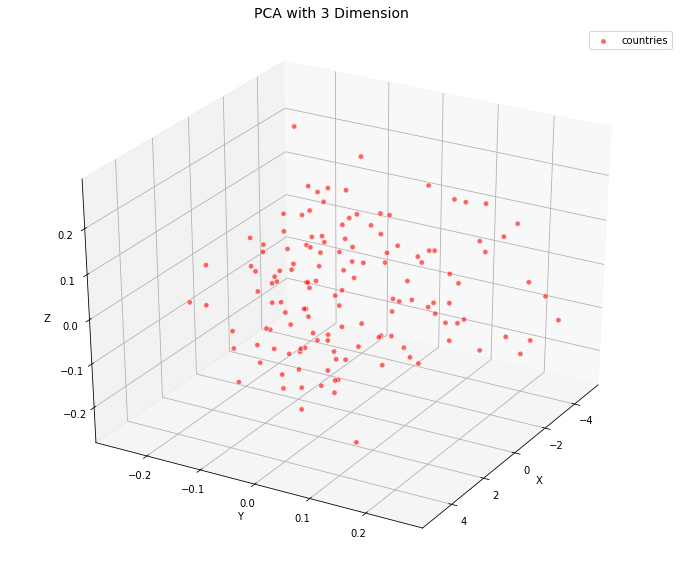

In [13]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
fig.subplots_adjust(top=0.95)
fig.suptitle('PCA with 3 Dimension', fontsize=14)

xs1 = X_1[:,0][:]
ys1 = X_1[:,1][:]
zs1 = X_1[:,2][:]
ax.scatter(xs1, ys1, zs1, s=30, alpha=0.6, edgecolors='w', color = 'red', label='countries')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(30,30)
plt.legend()
plt.draw()

Above, we did projection using PCA without applying dimensionality reduction. From the variance ratios, we can see that the first two axis account for majority of the variance, implying that these two transformed axis capture the essential properties of the entire set of data.

In [14]:
pca = PCA(n_components=2)
pca.fit(X)
X_2 = pca.transform(X)

print('Eigenvectors:\n', pca.components_)
print('Eigenvalues:\n', pca.explained_variance_)
print('Explained Variance Ratio:\n', pca.explained_variance_ratio_)
print('Total explained Variance Ratio:\n', sum(pca.explained_variance_ratio_))

Eigenvectors:
 [[-0.01202575  0.07156059  0.99736376]
 [ 0.86166552 -0.50532822  0.04664673]]
Eigenvalues:
 [6.65116613 0.01433846]
Explained Variance Ratio:
 [0.99611699 0.00214741]
Total explained Variance Ratio:
 0.9982644034053174


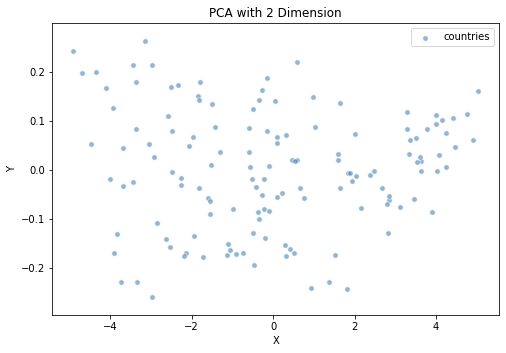

In [15]:
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(top=0.8)
ax = fig.add_subplot(111)

xs1 = X_2[:,0][:]
ys1 = X_2[:,1][:]
ax.scatter(xs1, ys1, s=30, alpha=0.6, edgecolors='w', color = 'steelblue', label='countries')

ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.title('PCA with 2 Dimension')

plt.legend()
plt.draw()

Next, above, we applied dimensionality reduction to reduce it to 2. Even after using dimensionality reduction, there is no distinct relationship among the variables we have presented.

### Regression

At this point of our project, we will apply linear regression and high-dimensional regression. Firstly, we'll be using a scatterplot to view the current distribution.

Text(0.5, 1.0, 'Linear to Employment Rate')

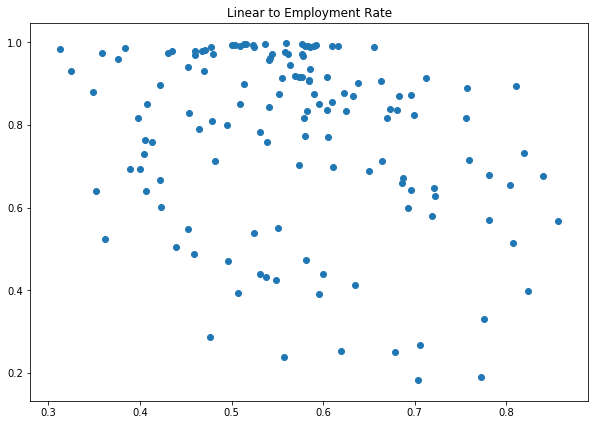

In [16]:
x = df['Employment Rate']
y = df['Literacy Rate']

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(top=1)

plt.scatter(x, y)
plt.title('Linear to Employment Rate')

In [17]:
model = LinearRegression()
x = np.array(x).reshape((-1, 1))
model.fit(x, y)

r_sq = model.score(x, y)
print('Coefficient of determination:', r_sq)
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

y_pred = model.predict(x)

Coefficient of determination: 0.07071682385809042
Intercept: 1.0422346132424825
Slope: [-0.47367135]


This regression results in a model like:

$$ Literacy Rate = 1.04223 + (-0.47367) \times Employment Rate $$

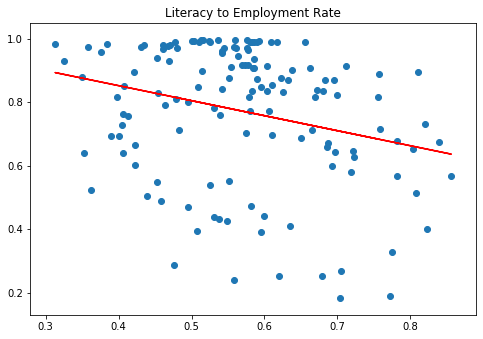

In [18]:
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(top=0.8)
plt.scatter(x, y)
plt.title('Literacy to Employment Rate')

plt.plot(x, y_pred, color = 'red')
plt.show()

After applying linear regression, we find a predicted relationship - one that opposes the hypothesis made in the beginning of our project. The prediction line highlights that as the employment rate increases, the literacy rate drops from around 90% to 60-70%.

In [19]:
x = df[['Avg. Years in School (M)', 'Avg. Years in School (W)']]
y = df['Employment Rate']

In [20]:
model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.06582054844731555
intercept: 0.6403955359315294
slope: [-0.01489153  0.00265219]


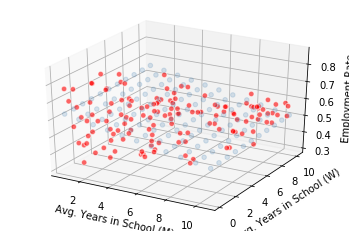

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = df['Avg. Years in School (M)']
ys = df['Avg. Years in School (W)']
zs = df['Employment Rate']
ax.scatter(xs, ys, zs, s=30, alpha=0.6, edgecolors='w', color = 'red')

ax.set_xlabel('Avg. Years in School (M)')
ax.set_ylabel('Avg. Years in School (W)')
ax.set_zlabel('Employment Rate')

xp = np.linspace(min(df['Avg. Years in School (M)']),max(df['Avg. Years in School (M)']),11)
yp = np.linspace(min(df['Avg. Years in School (W)']),max(df['Avg. Years in School (W)']),11)
x,y = np.meshgrid(xp, yp)
z = model.intercept_ + model.coef_[0]*x + model.coef_[1]*y

ax.scatter(x,y,z, alpha=0.2, color = 'steelblue')

plt.draw()
    

Similar to that of the 2D scatterplot above, the countries are scattered and there is not a clear pattern, but a possible prediction. However, there is no distinct relationship between the average years in school of both men and women, with their country's employment rate.

### Comparison

At this point of our project, we will also introduce a different possible factor we mentioned in our proposal: a country's economy. To do this, we will take the GDP total, as well as the GDP per capita. To compare, we will use the heat correlation map and linear regression.

In [22]:
GDP = pd.read_csv(r"./gdp_total_yearly_growth.csv", sep=',', index_col = 'country')
GDPcap = pd.read_csv(r"./gdp_per_capita_yearly_growth.csv", sep=',', index_col = 'country')

In [23]:
GDP2 = GDP.T.describe().T
GDPcap2 = GDPcap.T.describe().T

In [24]:
data = [employment2["mean"], GDP2["mean"], GDPcap2["mean"]]
headers = ["Employment Rate", "GDP", "GDP per capita"]

df2 = pd.concat(data, axis = 1, keys = headers, sort = True)
df2 = df2.dropna()
print(df2)

             Employment Rate       GDP  GDP per capita
Afghanistan         0.476594  1.718160        0.641626
Albania             0.479406  2.218883        1.312205
Algeria             0.352406  2.364089        1.108272
Angola              0.649875  2.464300        1.255575
Argentina           0.541813  3.628628        1.491596
...                      ...       ...             ...
Venezuela           0.577094  3.580869        1.689289
Vietnam             0.757281  2.214135        1.058511
Yemen               0.361469  1.690850        0.598122
Zambia              0.686250  2.265815        0.907661
Zimbabwe            0.756219  1.596474        0.468059

[179 rows x 3 columns]


In [25]:
df2.max()

Employment Rate    0.856188
GDP                5.052880
GDP per capita     2.498261
dtype: float64

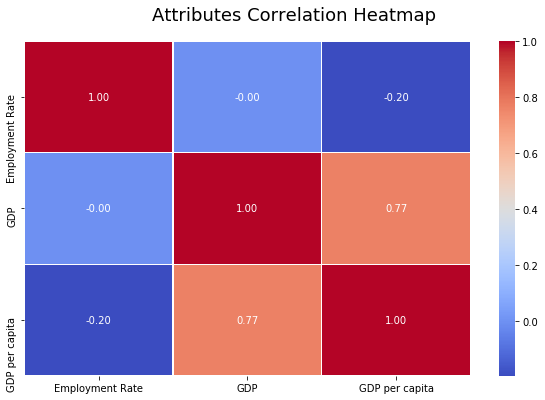

In [26]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df2.corr()
hm = sns.heatmap(round(corr,4), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.1)
f.subplots_adjust(top=0.9)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=18)

From the heatmap above, we see that employment rate and GDP have 0 correlation, while that of employment rate and GDP per capita is -0.2. This implies that there's no direct relation between GDP and GDP per capita with the employment rate.

Text(0.5, 1.0, 'GDP to Employment Rate')

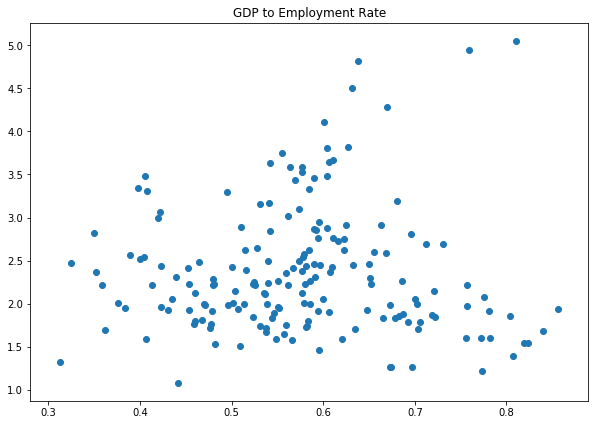

In [27]:
x2 = df2['Employment Rate']
y2 = df2['GDP']

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(top=1)

plt.scatter(x2, y2)
plt.title('GDP to Employment Rate')

In [28]:
model = LinearRegression()
x2 = np.array(x2).reshape((-1, 1))
model.fit(x2, y2)

r_sq = model.score(x2, y2)
print('Coefficient of determination:', r_sq)
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

y_pred2 = model.predict(x2)

Coefficient of determination: 2.7830342141932363e-07
Intercept: 2.3671536415091436
Slope: [-0.00340744]


The regression model achieved is:

$$ GDP = 2.36715 + (-0.003407) \times Employment Rate $$

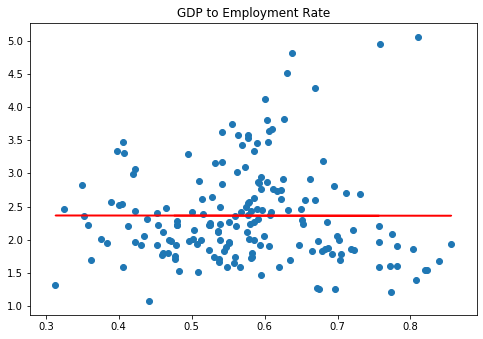

In [29]:
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(top=0.8)
plt.scatter(x2, y2)
plt.title('GDP to Employment Rate')

plt.plot(x2, y_pred2, color = 'red')
plt.show()

After applying the same linear regession method with the GDP data, the predicted line is almost horizontal, presenting the idea that a lower or higher employment rate is unaffected by the country's GDP.

Through these two tests, we can rule out that a country's employment rate is dependent on the country's economy.

### Classification and Clustering

Finally, we will apply classification and clustering methods to our data.

In [30]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

In [359]:
df1 = df.drop(columns = ['Literacy Rate','Unemployment Rate'])

In [360]:
df1_embedded = TSNE(n_components=2).fit_transform(df1)

In [361]:
df1

,Employment Rate,Avg. Years in School (M),Avg. Years in School (W)
Afghanistan,0.476594,1.5675,0.1700
Albania,0.479406,7.6800,6.4800
Algeria,0.352406,2.5775,2.0300
Angola,0.649875,3.0600,1.3525
Argentina,0.541813,7.9025,7.8300
...,...,...,...
Venezuela,0.577094,6.1850,5.7775
Vietnam,0.757281,6.5200,4.6250
Yemen,0.361469,1.8100,0.2775
Zambia,0.686250,5.2075,2.8700


In [362]:
def plot_tsne(df1_embedded, labels):
    for i in range(df1_embedded.shape[0]):
        if labels[i] == 0:
            color = "Green"
        elif labels[i] == 1:
            color = "Blue"
        elif labels[i] == 2:
            color = "Red"
        plt.plot(df1_embedded[i, 0], df1_embedded[i, 1], '.', color=color)

In this case, we will select K=3. We want to identify 3 clusters.

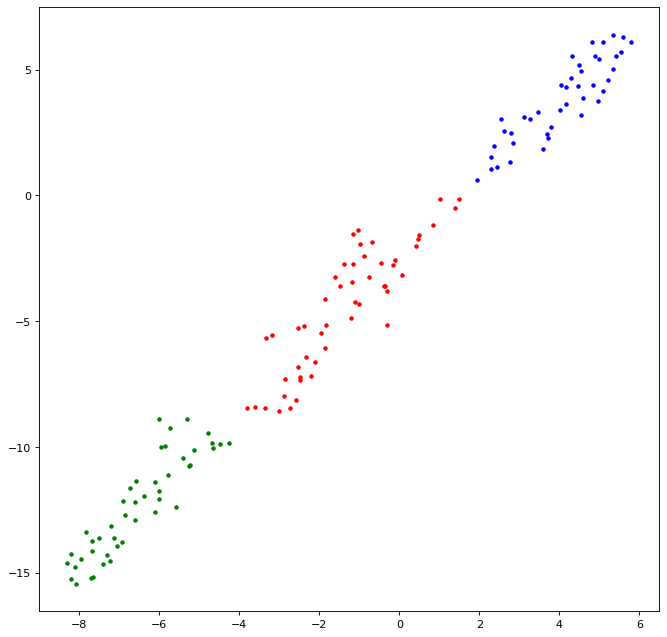

In [364]:
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(df1)
plt.figure(figsize=(10, 10), dpi=80)
plot_tsne(df1_embedded, kmeans_labels)

The Clustering graph shows a linear relationship of three data: average years in school of both men and women, Employment Rate. However, there are no distinct groupings amount the 3 data set. 

In [365]:
#importing libraries for decisionTree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Adding one more attriubute 'Employment_label' on the df data set. We use this attriubute to be the class_name of the decision tree.0,1,2 meaning the employment rate is low,medium,high respectively.

In [366]:
df['Employment_label'] = df['Employment Rate'].apply(lambda value: '0' 
                                                          if value <= 0.5 else '1' 
                                                              if value <= 0.7 else '2')
df['Employment_label'] = pd.Categorical(df['Employment_label'], 
                                             categories=['0', '1', '2'])
df

,Employment Rate,Unemployment Rate,Literacy Rate,Avg. Years in School (M),Avg. Years in School (W),Employment_label
Afghanistan,0.476594,0.020900,0.286000,1.5675,0.1700,0
Albania,0.479406,0.148455,0.971333,7.6800,6.4800,0
Algeria,0.352406,0.178850,0.640667,2.5775,2.0300,0
Angola,0.649875,0.131150,0.689000,3.0600,1.3525,1
Argentina,0.541813,0.082346,0.962750,7.9025,7.8300,1
...,...,...,...,...,...,...
Venezuela,0.577094,0.088543,0.916400,6.1850,5.7775,1
Vietnam,0.757281,0.019175,0.890600,6.5200,4.6250,2
Yemen,0.361469,0.125000,0.524000,1.8100,0.2775,0
Zambia,0.686250,0.111700,0.659000,5.2075,2.8700,1


In [367]:
df3 = df.drop(columns = ['Employment Rate','Unemployment Rate'])
df3

,Literacy Rate,Avg. Years in School (M),Avg. Years in School (W),Employment_label
Afghanistan,0.286000,1.5675,0.1700,0
Albania,0.971333,7.6800,6.4800,0
Algeria,0.640667,2.5775,2.0300,0
Angola,0.689000,3.0600,1.3525,1
Argentina,0.962750,7.9025,7.8300,1
...,...,...,...,...
Venezuela,0.916400,6.1850,5.7775,1
Vietnam,0.890600,6.5200,4.6250,2
Yemen,0.524000,1.8100,0.2775,0
Zambia,0.659000,5.2075,2.8700,1


In [368]:
#separating the target value from rest of the data
X = df3.iloc[:,:3]
y = df3.iloc[:,-1]

In [369]:
#Splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [370]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [371]:
classifier = DecisionTreeClassifier()
clf = classifier.fit(X_train,y_train.astype('str'))

In [372]:
#predicting the class based on the test data
y_pred = classifier.predict(X_test)
y_pred

array(['1', '1', '2', '1', '1', '2', '1', '1', '1', '1', '0', '1', '1',
       '1', '1', '2', '1', '2', '1', '1', '0', '1', '1', '1', '1', '2',
       '1', '0', '1', '2', '1', '2', '1', '1', '0'], dtype=object)

In [373]:
from sklearn import tree

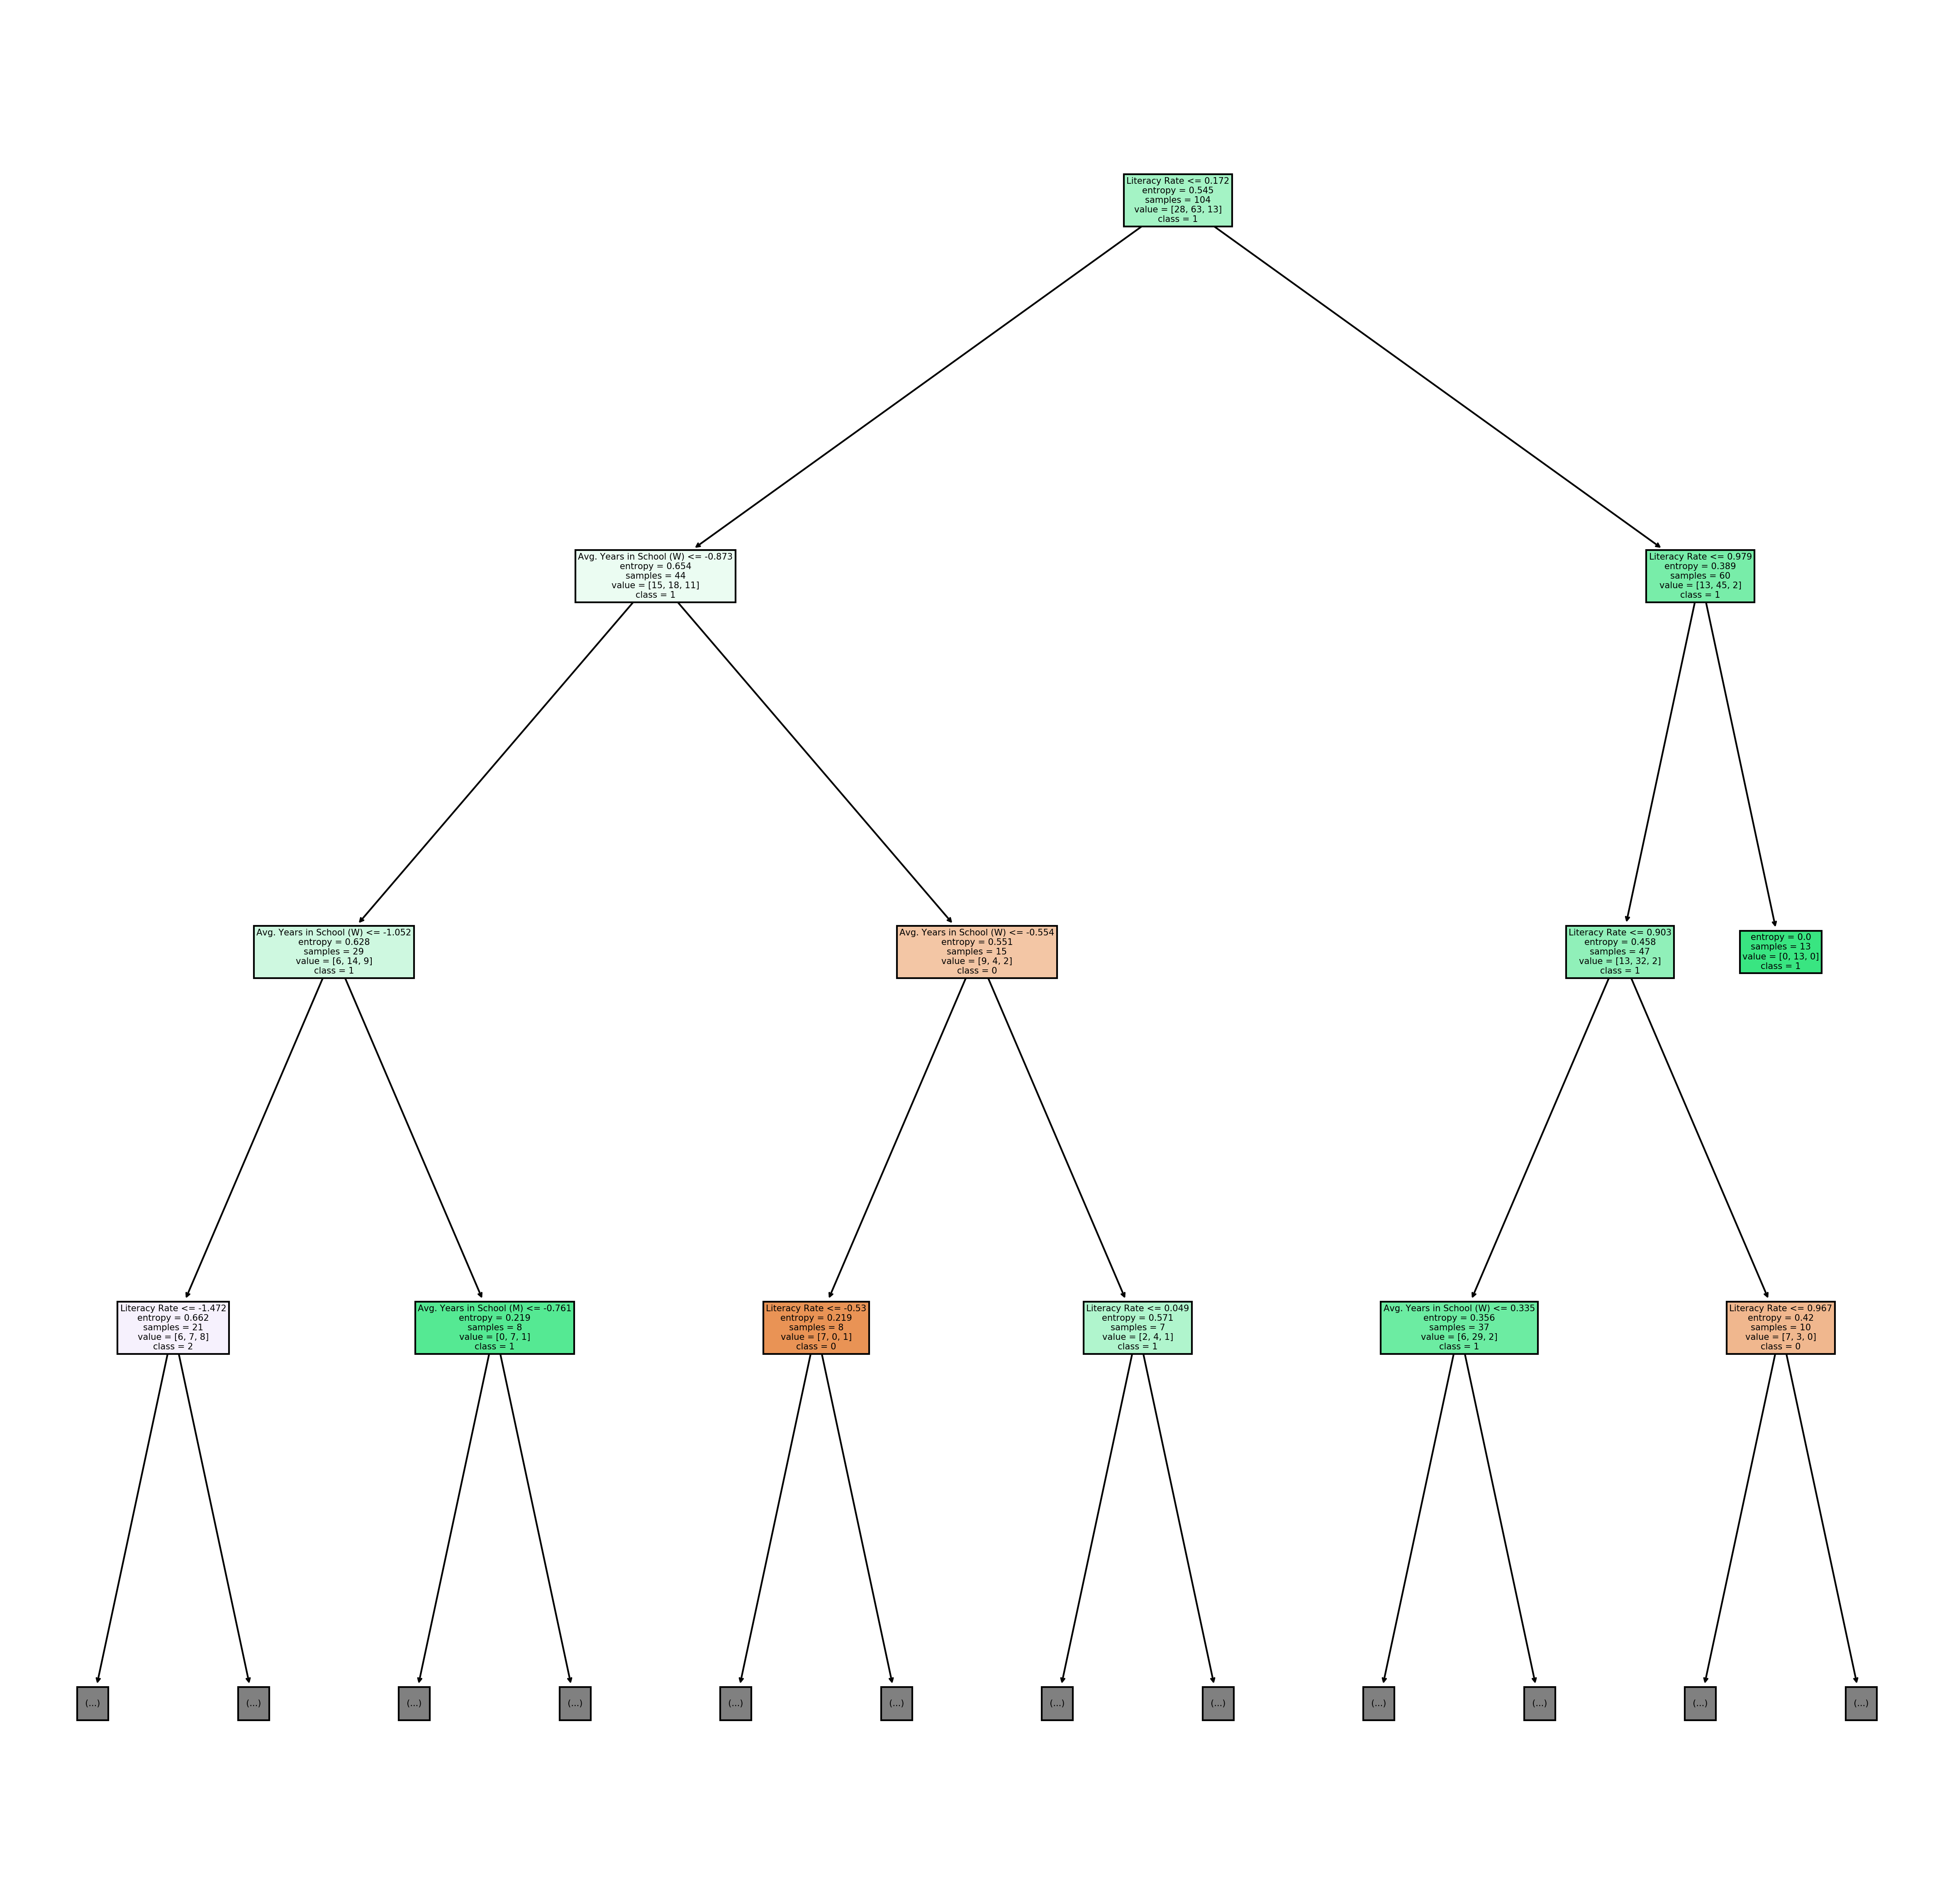

In [374]:
#visualizing tree
y = pd.DataFrame(y)
X = pd.DataFrame(X)
feature_names = df3.columns[:3]
class_names = ['0', '1','2']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)

tree.plot_tree(clf, feature_names = feature_names, class_names = class_names, filled = True, max_depth = 3);

### Limitations

Within this project, though we have generated reasonable results, there were a few limitations we faced, possibly affecting its accurary.

- Compiling into one dataframe: After generating the mean for each attribute, we concatenated these into one dataframe. However, because each attribute had their own number of countries for data provided, the concatenated dataframe resulted in some cells containing "NaN". With this, we chose to drop the rows that had "NaN" to prevent any programming malfunctions or limitations.

### Summary

To summarize, our group constructed a conjecture, "A country's employment rate is mainly dependent on the prevalence and affluence of their education system", to identify to what extent a country's education system is a factor to their employment rates.

In our project, we included data involving employment and unemployment rates, literacy rates, and mean years in school. We used different statistical analysis methods to identify any form of relationship or dependence, whether causal or not. Our hypothesis was that the greater prevalence and affluence of a country's education system, the higher their employment rate will be.

Majority of our results mainly concluded that there is no direct relationship between the different attributes we have selected, but some of our approaches revealed a predicted pattern, such as when we used linear regression. However, the predicted relationship showed an opposing direction, that the greater the employment rate, the more average the literacy rate.

Through comparisons, we our group tested a possible determining factor, economy. However, with the same methods, results show that even a country's economy is not a dominant factor.

Therefore, our group declares the conjecture to be inaccurate, that a country's employment rate DOES NOT mainly depend on the prevalence and affluence of their education system. This leads our group to believe that there are multiple factors that affect a country's employment rate, and that it is a case-to-case basis.